In [212]:
import pandas as pd

In [213]:
tweets = pd.read_csv('data/tweets.csv')

C:\Users\jsanchez\AppData\Local\Temp\ipykernel_14232\3641524413.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv('data/tweets.csv')


In [214]:
tweets

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],...,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN
1,1427736867739299841,1427736867739299841,1.629234e+12,2021-08-17 22:59:29,200,NaN,Some casual suggestions to 😏SLIDE😏 into when u...,en,"['shoesdaytuesday', 'afterskewlslide']",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1427667300488937476,1427667300488937476,1.629217e+12,2021-08-17 18:23:03,200,NaN,RT @ValaAfshar: You are not your job.,en,[],[],...,NaN,NaN,2.597252e+08,You are not your job.,1.427648e+18,[],2021-08-17 17:05:53 CEST,NaN,NaN,NaN
3,1427667012105371652,1427667012105371652,1.629217e+12,2021-08-17 18:21:55,200,NaN,What have we become 😔😂 Toddler Cites Freedom ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1427497703596990467,1427497703596990467,1.629177e+12,2021-08-17 07:09:08,200,NaN,The tech giants that refuse to massively addre...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40576,1427593440469061634,1427593440469061634,1.629200e+12,2021-08-17 13:29:34,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
40577,1427592955272089642,1427592930722820096,1.629200e+12,2021-08-17 13:27:38,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
40578,1427592942441598980,1427592930722820096,1.629200e+12,2021-08-17 13:27:35,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
40579,1427592930722820096,1427592930722820096,1.629200e+12,2021-08-17 13:27:32,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [215]:
# Count number of hastags
def has_hashtags(row):
    return row['tweet'].count('#') > 0


tweets['nhashtags'] = tweets.apply(has_hashtags, axis=1)

print(tweets.nhashtags.value_counts())
print(tweets.nreplies.mean())
print(tweets.groupby('nhashtags').nreplies.mean())

nhashtags
False    35202
True      5379
Name: count, dtype: int64
72.70291515733965
nhashtags
False    73.038748
True     70.505112
Name: nreplies, dtype: float64


In [216]:
# Regular tweets vs replies
print(tweets[tweets['id'] != tweets['conversation_id']].nreplies.mean())
print(tweets[tweets['id'] == tweets['conversation_id']].nreplies.mean())

33.37666286583048
78.56193550213766


In [217]:
# Retweets vs original tweets
retweets = tweets[tweets['retweet']]

In [218]:
# Language
print(tweets.nlikes.mean())
print(tweets[tweets['language'] == 'en'].nreplies.mean())
print(tweets[tweets['language'] != 'en'].nreplies.mean())
print(tweets[tweets['language'] == 'ko'].nreplies.mean())

1333.355437273601
70.2406506736773
80.08412964239976
1315.2153846153847


In [219]:
tweets[tweets['language'] == 'ko']

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,nhashtags
1612,1426423342349889536,1426423342349889536,1.628921e+12,2021-08-14 08:00:01,200,NaN,"시몬 got us grooving, twice 👯‍♀️ https://t.co/n...",ko,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,False
3555,1427535114163036161,1427535114163036161,1.629186e+12,2021-08-17 09:37:48,200,NaN,By popular demand.. -남준- https://t.co/tdNbLK9rb9,ko,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,False
4785,1425660944416485383,1425660944416485383,1.628739e+12,2021-08-12 05:30:31,200,NaN,"나는 혼자가 아니다. 나는 내가 만나고, 내 책을 통해 내 영혼을 이해하게 된 수많...",ko,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,False
10252,1427473943573585922,1427473943573585922,1.629171e+12,2021-08-17 05:34:43,200,NaN,RT @OfficialPnation: [HyunA] 'GOOD GIRL' MV 유튜...,ko,[],[],...,NaN,1.077785e+18,[HyunA]\n'GOOD GIRL' MV 유튜브 천만뷰 돌파!🥳\n'GOOD GI...,1.427465e+18,[],2021-08-17 04:57:53 CEST,NaN,NaN,NaN,False
10259,1426548047647891457,1426548047647891457,1.628951e+12,2021-08-14 16:15:33,200,NaN,RT @PNATION_LOUD: [📣] Welcome to P NATION LOU...,ko,[],[],...,NaN,1.426008e+18,[📣] \nWelcome to P NATION LOUD's Official Twit...,1.426545e+18,[],2021-08-14 16:01:54 CEST,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40508,1425739860694888454,1425739842822885378,1.628758e+12,2021-08-12 10:44:06,200,NaN,그 약속대로 건보 보장 범위는 대폭 확대하면서 재정은 안정적으로 관리했습니다. 지난...,ko,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,False
40509,1425739855141560322,1425739842822885378,1.628758e+12,2021-08-12 10:44:05,200,NaN,"4년 전, 건보 보장성 강화 정책을 마련할 때 건보 재정의 적자를 걱정하는 목소...",ko,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,False
40510,1425739852255952898,1425739842822885378,1.628758e+12,2021-08-12 10:44:04,200,NaN,"의료비 때문에 생계가 어려워지는 것을 막기 위해 저소득층 4대 중증질환에 대해서는,...",ko,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,False
40511,1425739845607952385,1425739842822885378,1.628758e+12,2021-08-12 10:44:02,200,NaN,정부는 특히 의료비 부담이 큰 암을 비롯한 중증질환을 중심으로 보장성 강화에 노력...,ko,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,False


In [220]:
# Quotes
print(tweets.nlikes.mean())
print(tweets[tweets['quote_url'] == '0'].nlikes.mean())
print(tweets[tweets['quote_url'] != '0'].nlikes.mean())

1333.355437273601
1304.663082437276
1746.2119833143724


In [224]:
# Has media?
def has_media(row):
    count = 0
    if row['urls'] != '[]':
        count += 1
    if row['photos'] != '[]':
        count += 1
    if row['video'] != 0:
        count += 1

    return count > 0


tweets['has_media'] = tweets.apply(has_media, axis=1)
print(tweets['has_media'].value_counts())
print(tweets.groupby('has_media').nreplies.mean())

has_media
True     27327
False    13254
Name: count, dtype: int64
has_media
False    75.973895
True     58.731731
Name: nreplies, dtype: float64


In [221]:
# Has media?
def media_count(row):
    count = 0
    if row['urls'] != '[]':
        count += 1
    if row['photos'] != '[]':
        count += 1
    if row['video'] != 0:
        count += 1

    return count


tweets['media_count'] = tweets.apply(media_count, axis=1)
print(tweets['media_count'].value_counts())
print(tweets.groupby('media_count').nreplies.mean())

media_count
1    20776
0    13254
2     3744
3     2807
Name: count, dtype: int64
media_count
0     86.457522
1     45.719821
2    193.345353
3     46.558247
Name: nreplies, dtype: float64


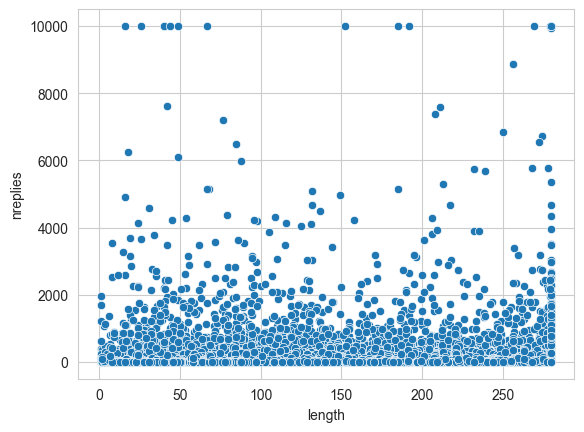

In [222]:
# Tweet length
tweets['length'] = tweets['tweet'].apply(len)
tweets['length'] = tweets['length'].clip(0, 280)
tweets['nreplies'] = tweets['nreplies'].clip(0, 10_000)

# Plot distribution between length and nreplies
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=tweets, x='length', y='nreplies')
plt.show()

In [223]:
print(tweets.nreplies.quantile([0.5, 0.8, 0.9, 0.95]))
tweets['popular'] = tweets.nreplies >= tweets.nreplies.quantile(0.95)

print(tweets.groupby('popular').nreplies.describe())

0.50      3.0
0.80     36.0
0.90    103.0
0.95    237.0
Name: nreplies, dtype: float64
           count        mean          std    min    25%    50%    75%      max
popular                                                                       
False    38546.0   19.165698    38.237891    0.0    0.0    3.0   17.0    236.0
True      2035.0  920.471253  1223.035311  237.0  338.0  521.0  954.0  10000.0
